# Post-processing of PyROA outputs

J. V. Hernández Santisteban<br>
University of St Andrews<br>
email: jvhs1@st-andrews.ac.uk<br>
<em>Updated: 27-Feb-2023</em>


### Let's load the PyROA utility library

In [1]:
import PyROA
# This one is for debuggin purposes
import importlib


It's convenient to describe a few parameters to be used throughout the document:

In [11]:
outputdir = 'pyroa_run/'                            # Where the *.obj files are stored
datadir = 'calibrated_lcs/'                      # Where the *.dat files are stored
filters=['u','B','g','g1','V','r','i','z']  # Order of the filters in the data cubes (same)
objname = 'Ark_120'                        # Name used in the datafiles
delay_ref = 'g1'                             # Filter used as the reference
burnin = 120000                             # Number of flattened chain to discard, from 0 to burnin.


In order to produce all diagnostic and analysis plots, you will require the following outputs from PyROA:
<p>
<li> X_t.obj - The model driving light curve</li>
<li> samples_flat.obj - The MC flattened chain file (i.e. merge all walker into a single file )</li>
<li> Lightcurve_models.obj - The best-fit driving light curve for each filter.</li>
</p>
It will also require access to the original light curves. You can point to a specific directory containing all light curves with the <code>datadir</code> flag.
    
The Utility packages will asume that the *.obj files have the default names from PyROA outputs. e.g., samples_flat.obj, for the flattened MC chains.

# 1. Convergence checks

## A) Autocorrelation Analysis
We will employ an autocorrelation analysis to determine whether the MCMC procedure has
converged. This method is suggested in the <code>emcee</code> documentation (https://emcee.readthedocs.io/en/stable/tutorials/autocorr/).

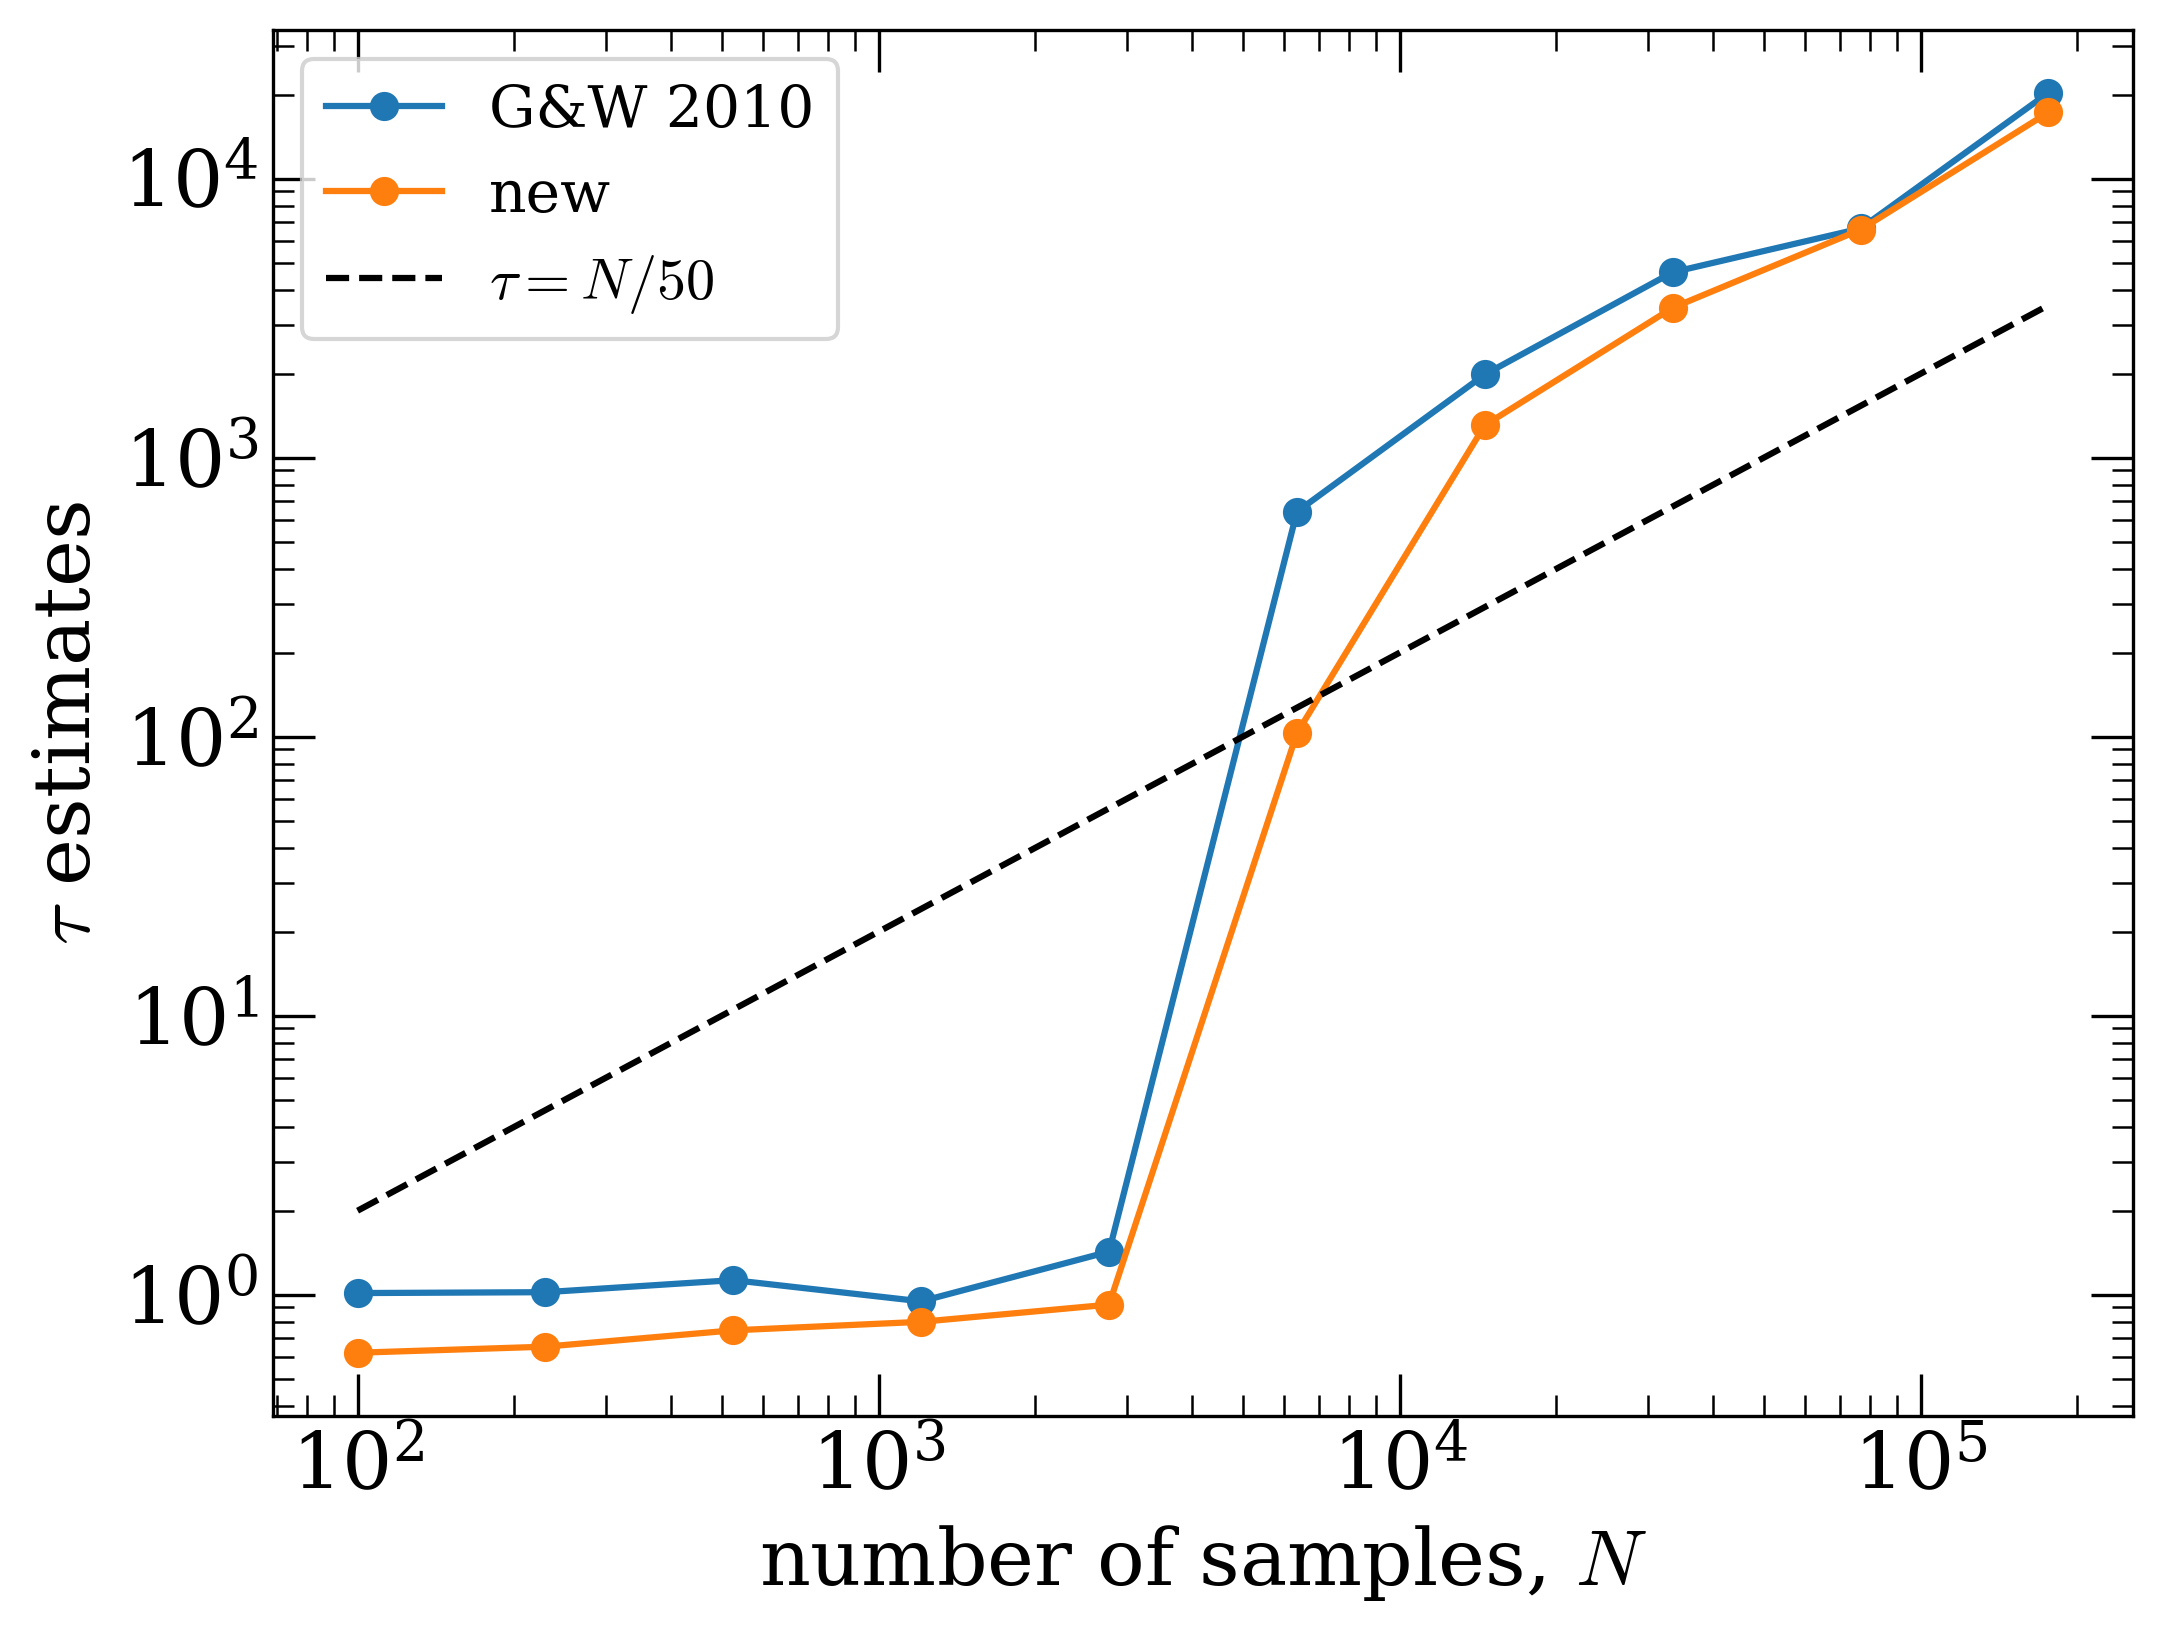

In [12]:
#importlib.reload(utils)
PyROA.Convergence(outputdir=outputdir)

## B. Parameter Chain plot

You can make several chain plot selecting a parameter of interest by changing the <code>"nparam"</code> code in the function. There are several predefined plots:

<li>'all' - Plot all parameters. CAUTION, this can be a very large plot!</li>
<li>'tau' - Plot <strong>only</strong> the time delay parameters</li>
<li>'A' - Plot <strong>only</strong> the A parameter, scaling factor</li>
<li>'B' - Plot <strong>only</strong> the B parameter, vertical shift</li>
<li>'sigma' - Plot <strong>only</strong> the $\sigma$ parameter, systematic uncertainty</li>
<li>'delta' - Plot <strong>only</strong> the $\Delta$ parameter, width of Gaussian ROA</li>

The burnin parameter that you  need to use in the "lightcurves" and "fluxflux" plots can be obtained using the two previous plots. Choose a reasonable chain number (from the x-axis) where all chains have converged.

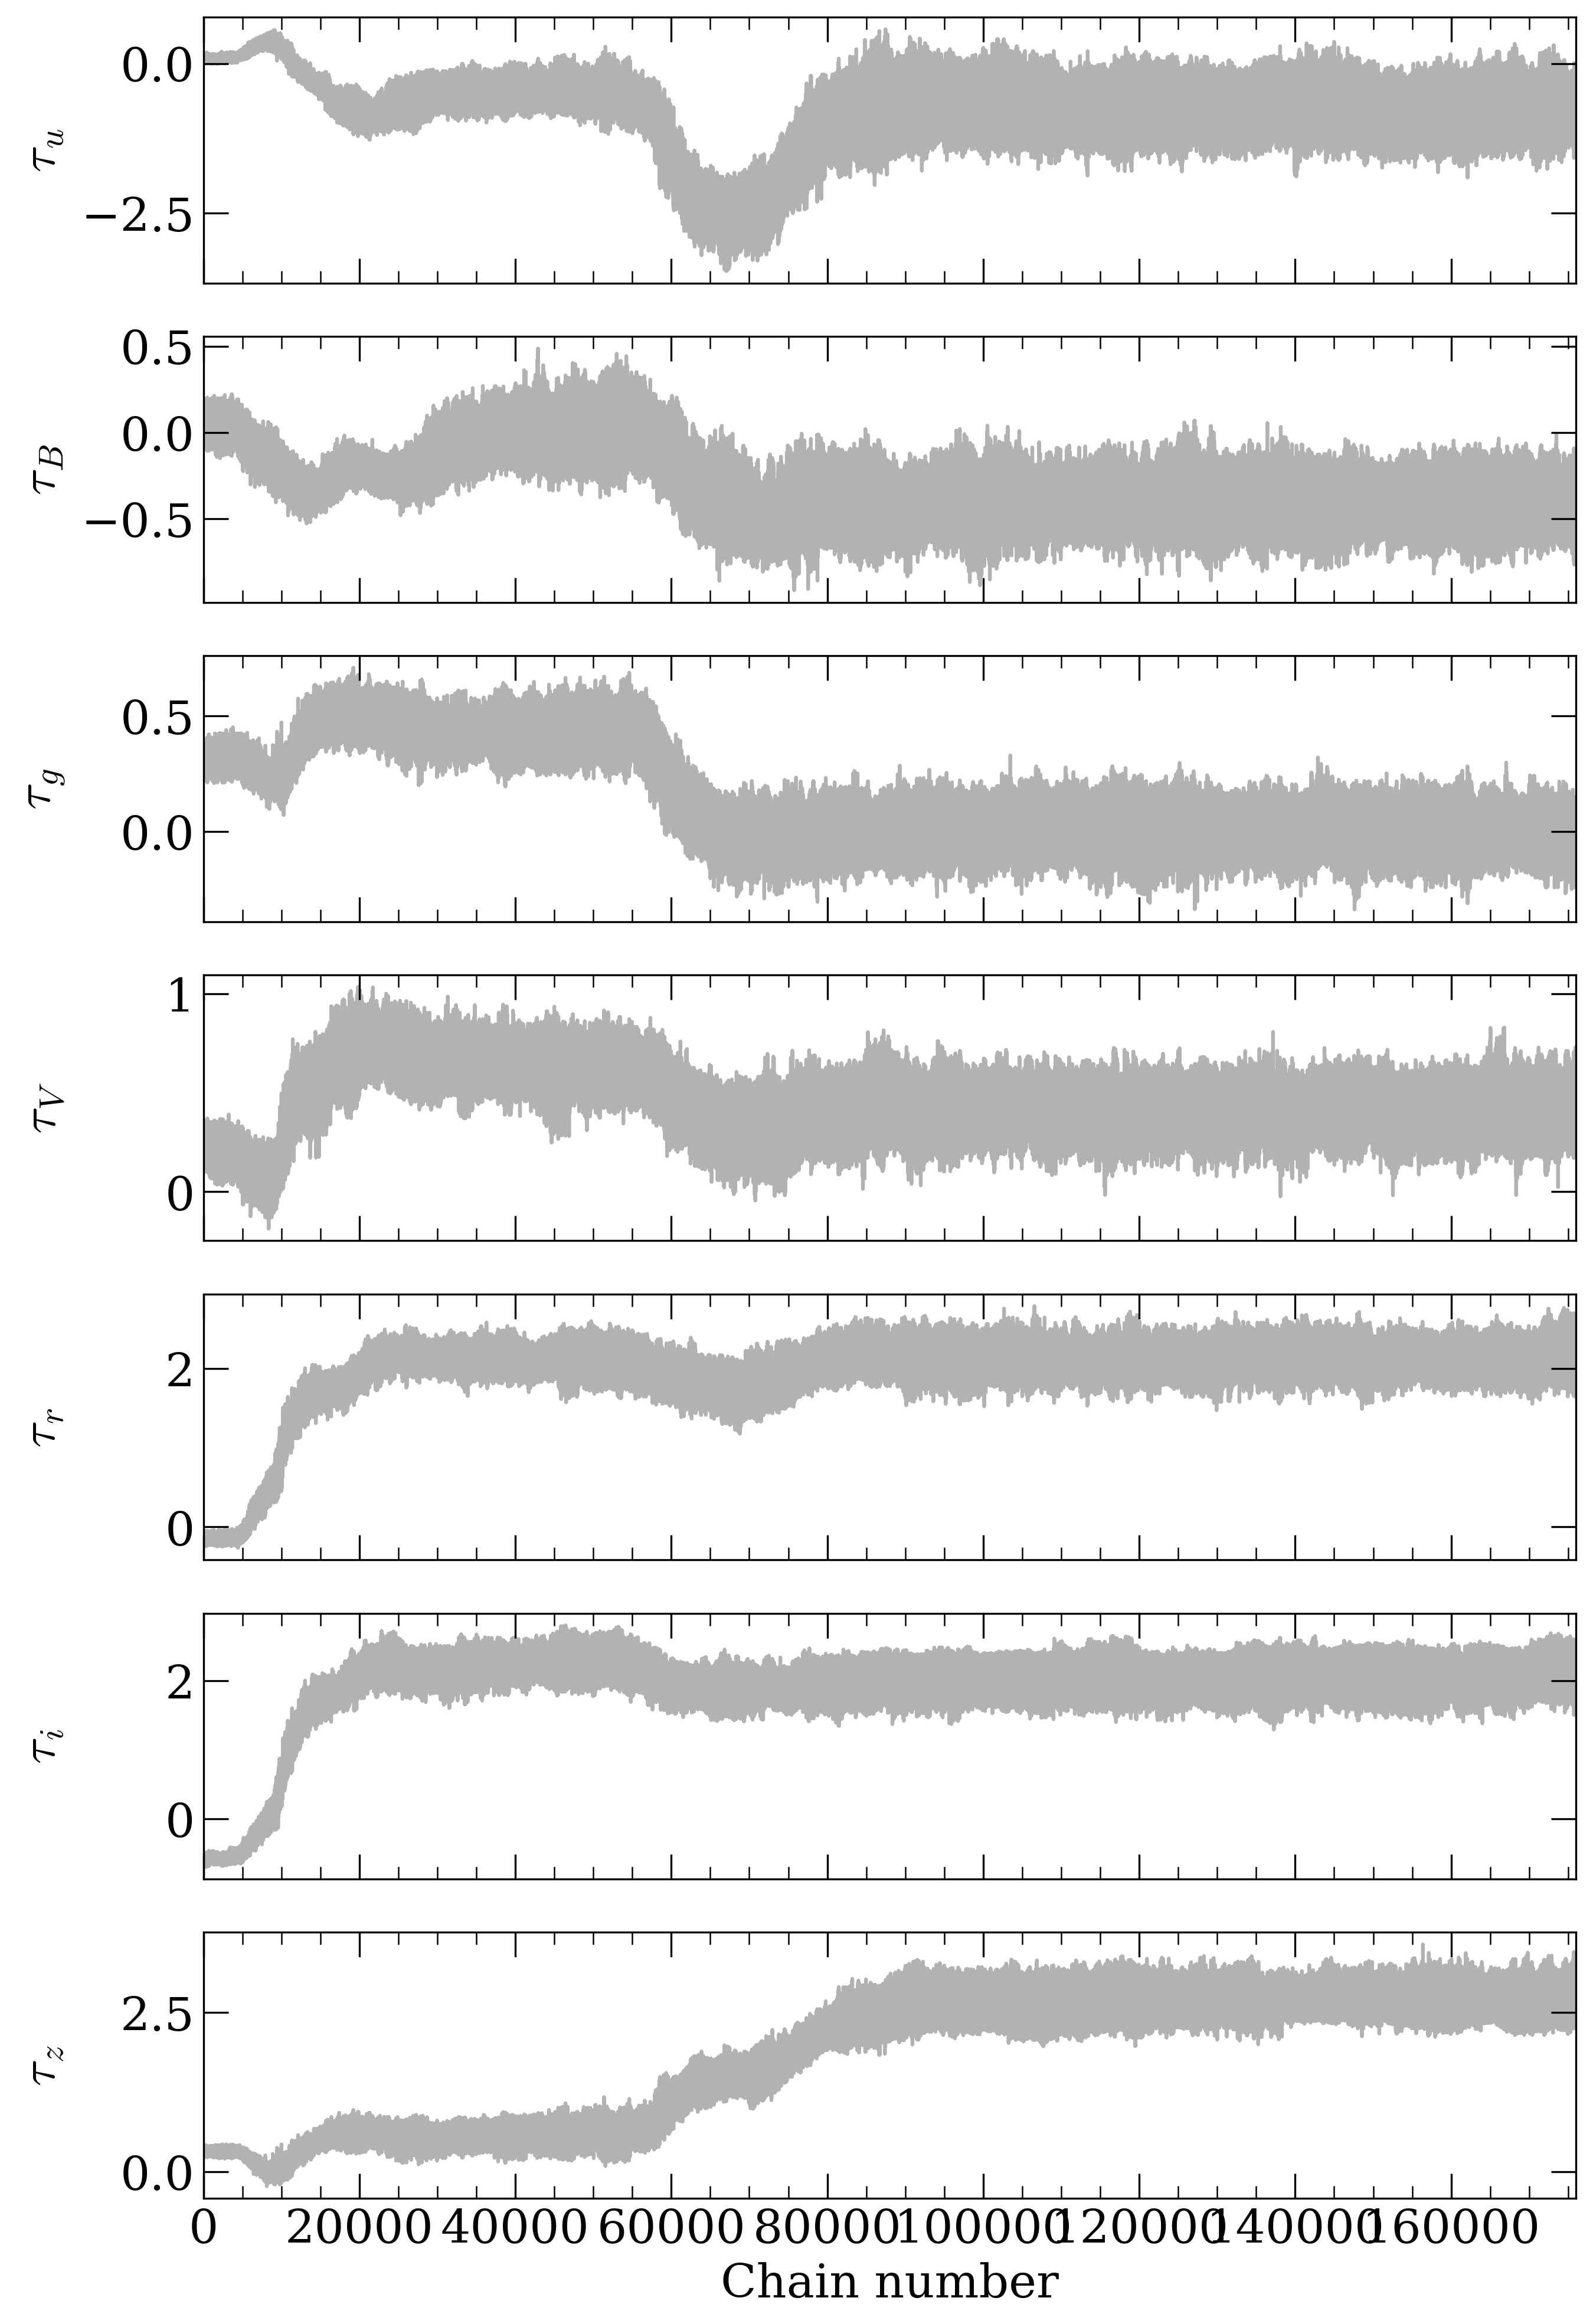

In [13]:
#importlib.reload(utils)

PyROA.Chains('tau',filters,delay_ref,outputdir=outputdir)

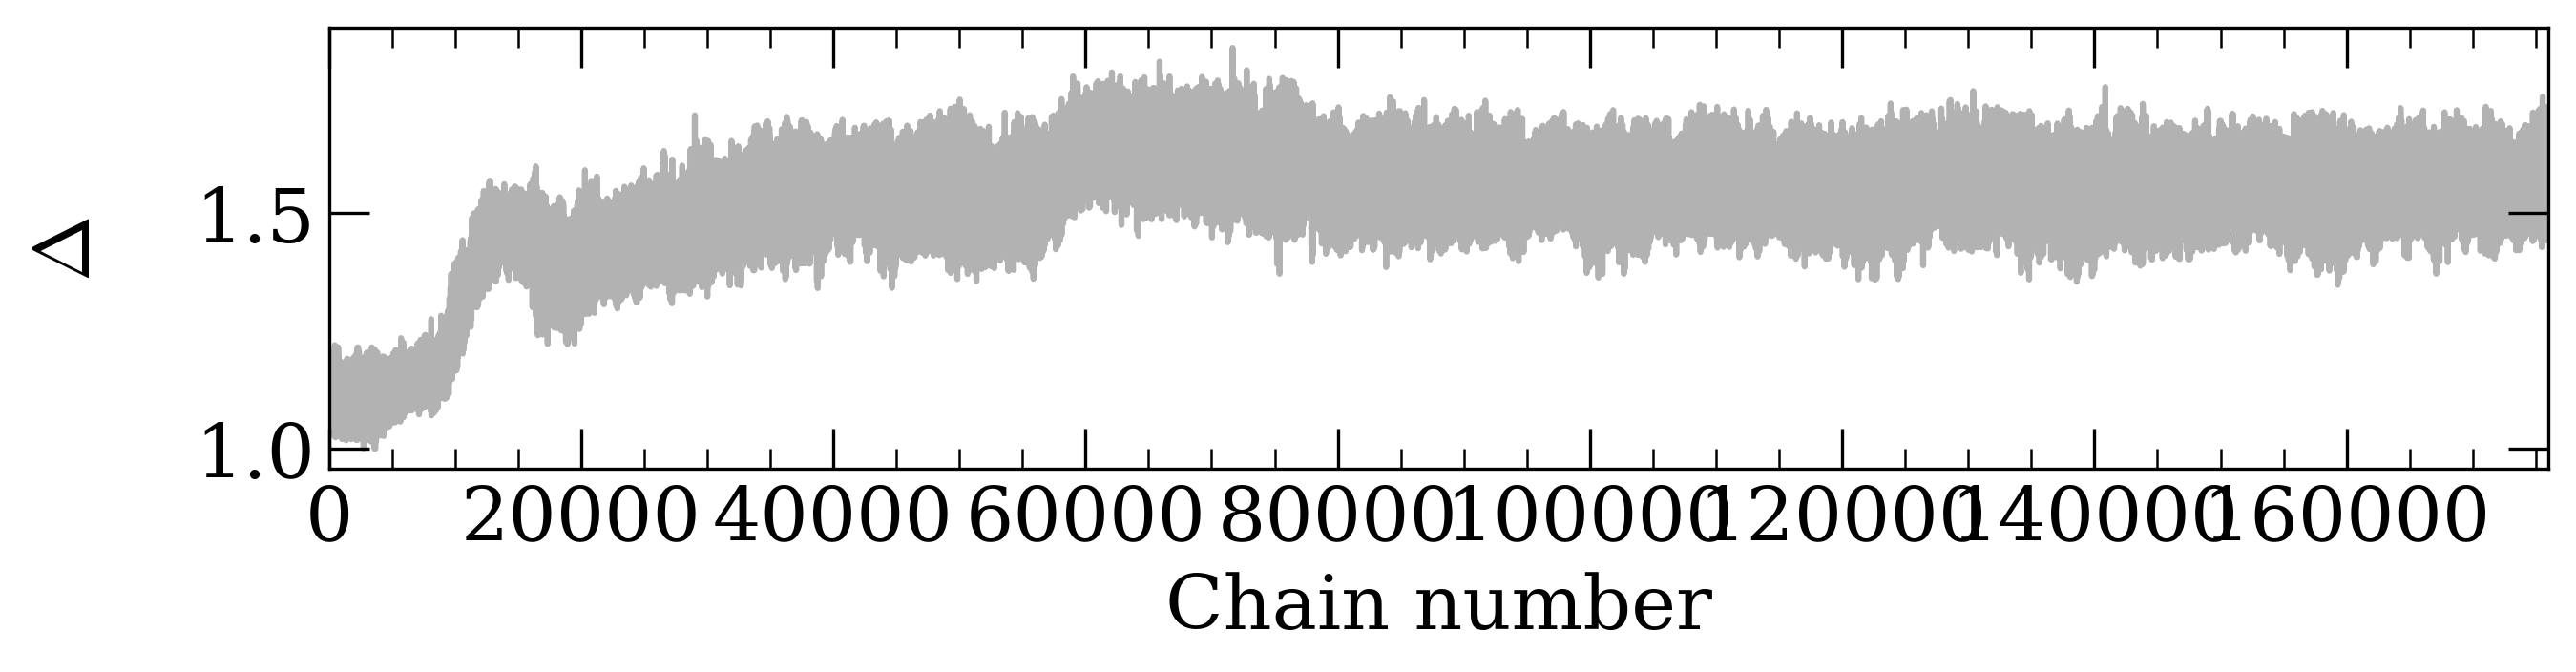

In [14]:
PyROA.Chains('delta',filters,delay_ref,outputdir=outputdir)

# 2. Corner plot

In a similar way as with the chain plot, you can choose either to plot the full corner plot of all parameters (can be a very big plot as well) or a subset of them.

<li>'all' - Plot all parameters. CAUTION, this can be a very large plot!</li>
<li>'tau' - Plot <strong>only</strong> the time delay parameters</li>
<li>'A' - Plot <strong>only</strong> the A parameter, scaling factor</li>
<li>'B' - Plot <strong>only</strong> the B parameter, vertical shift</li>
<li>'sigma' - Plot <strong>only</strong> the $\sigma$ parameter, systematic uncertainty</li>


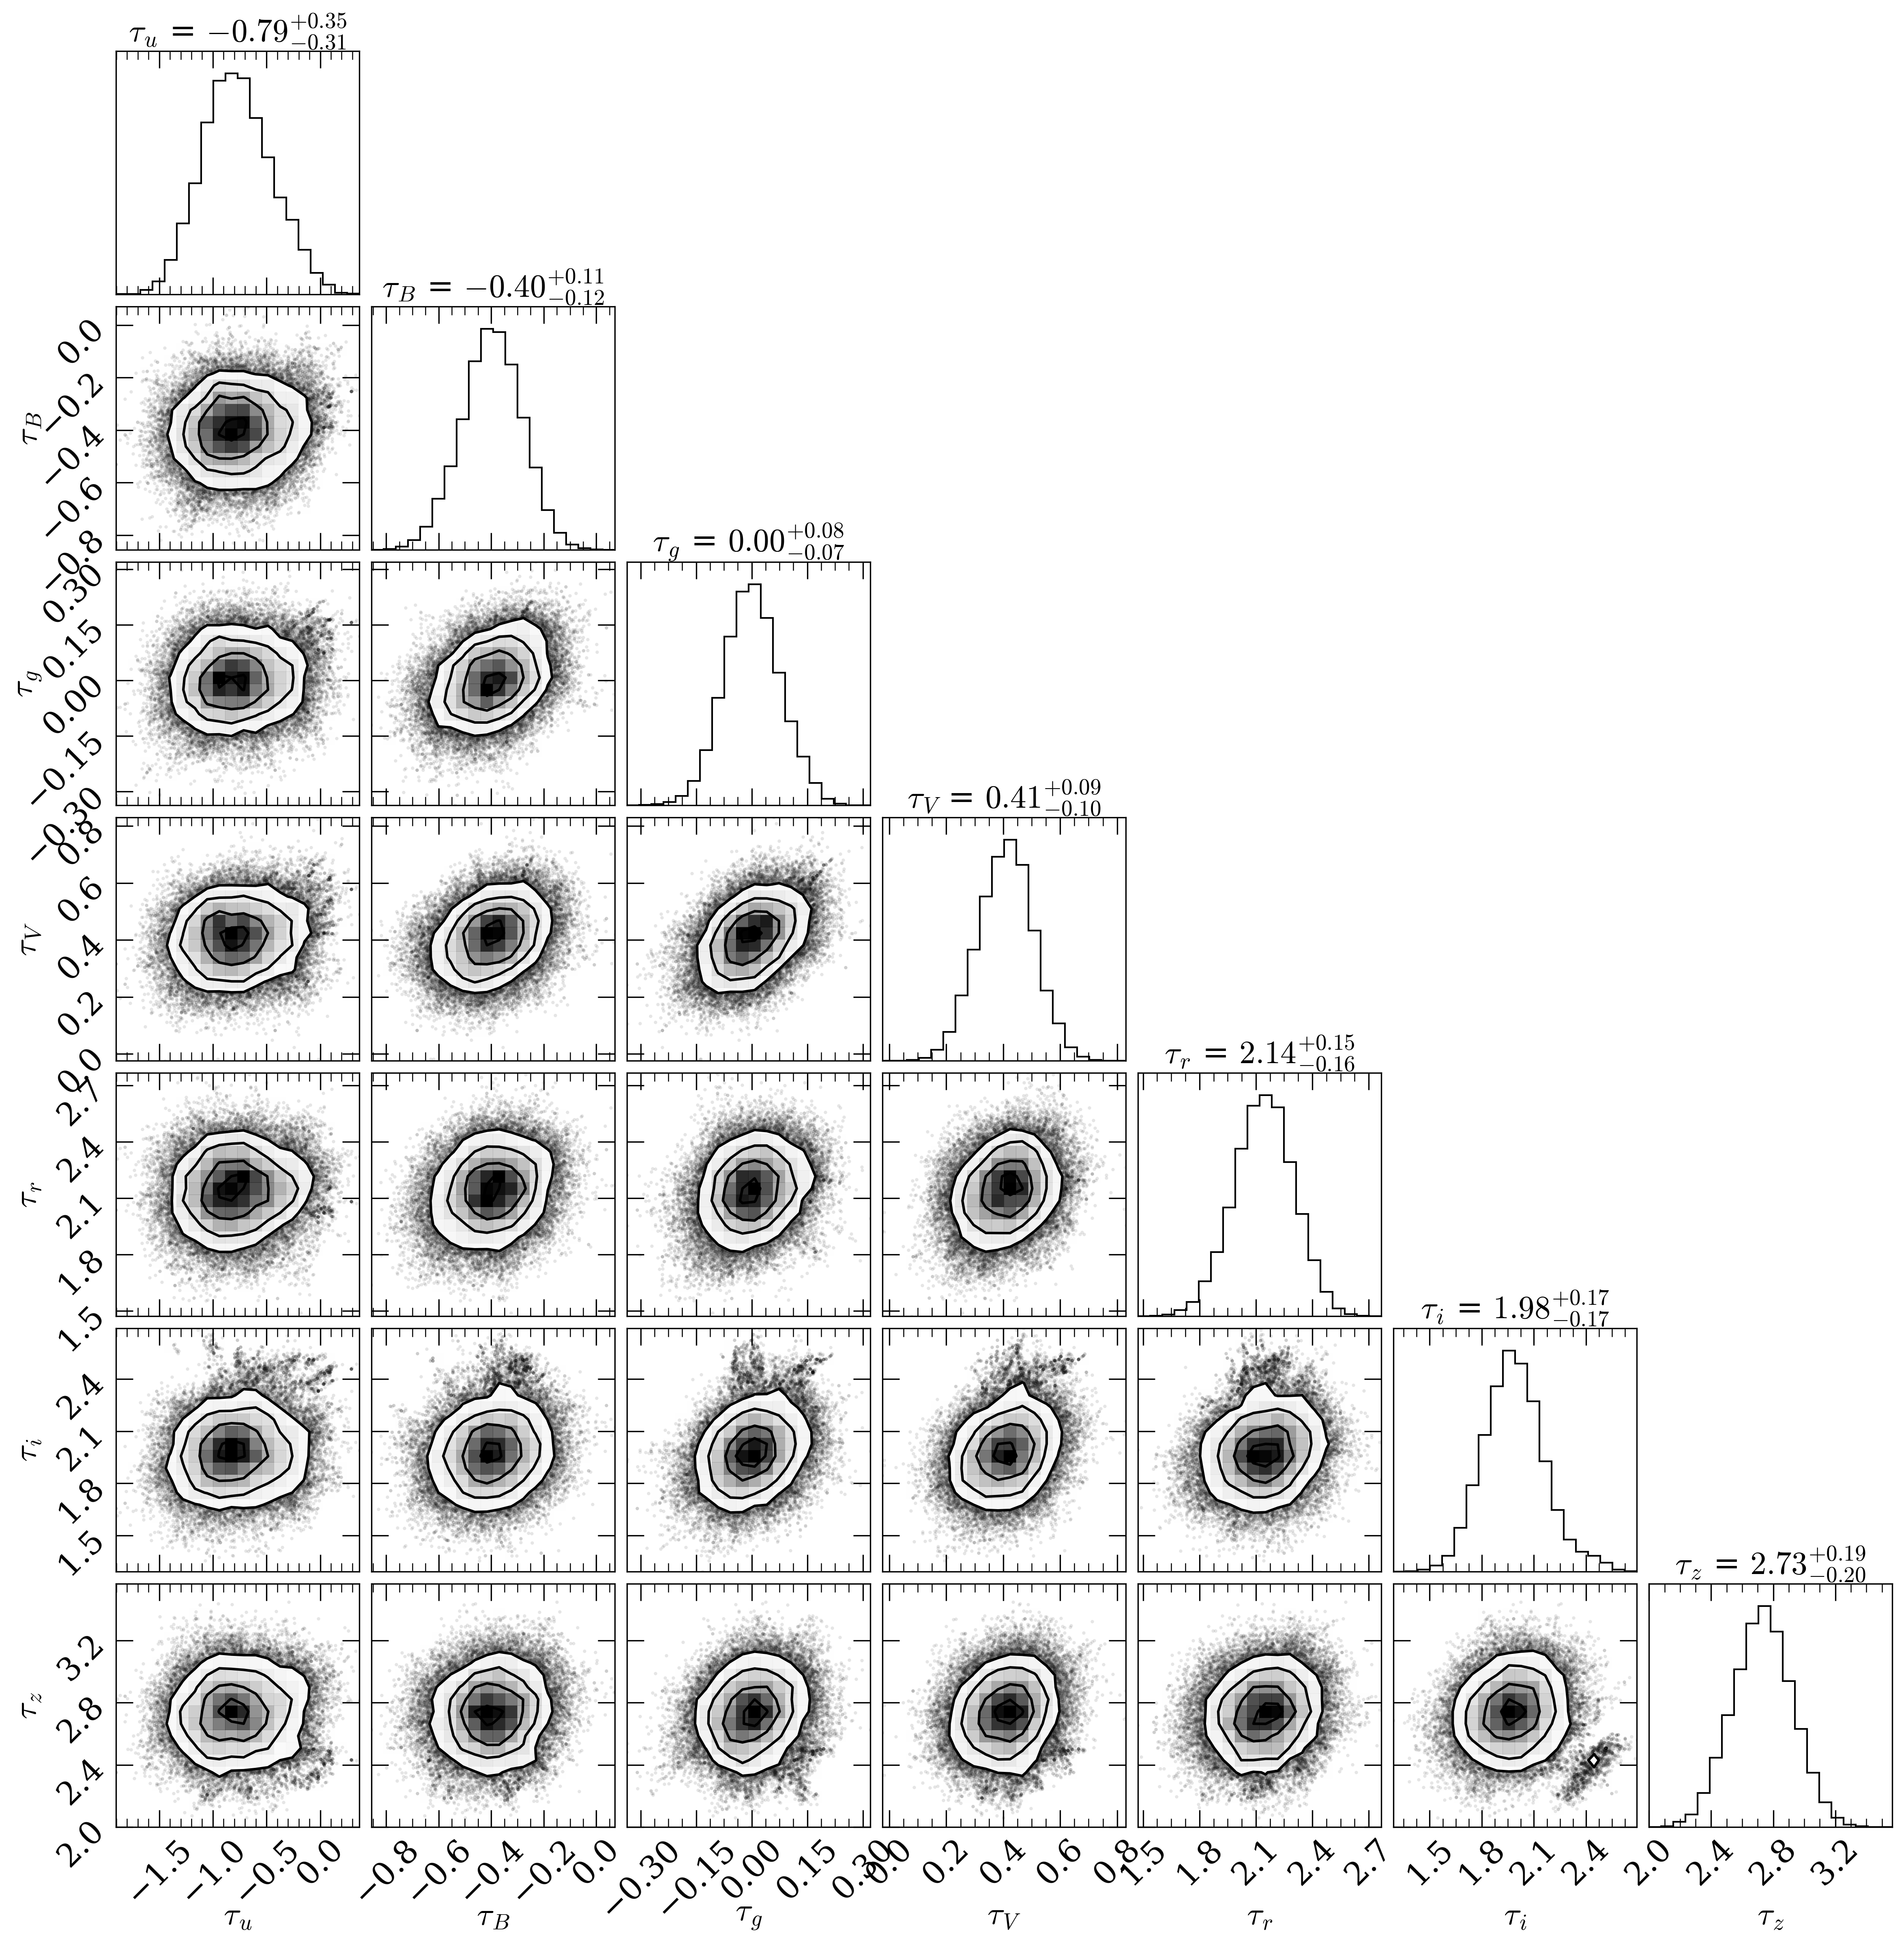

In [15]:
#importlib.reload(utils)
PyROA.CornerPlot('tau',filters,delay_ref,burnin=burnin,outputdir=outputdir)

# 3. Light curve fits and delay distributions

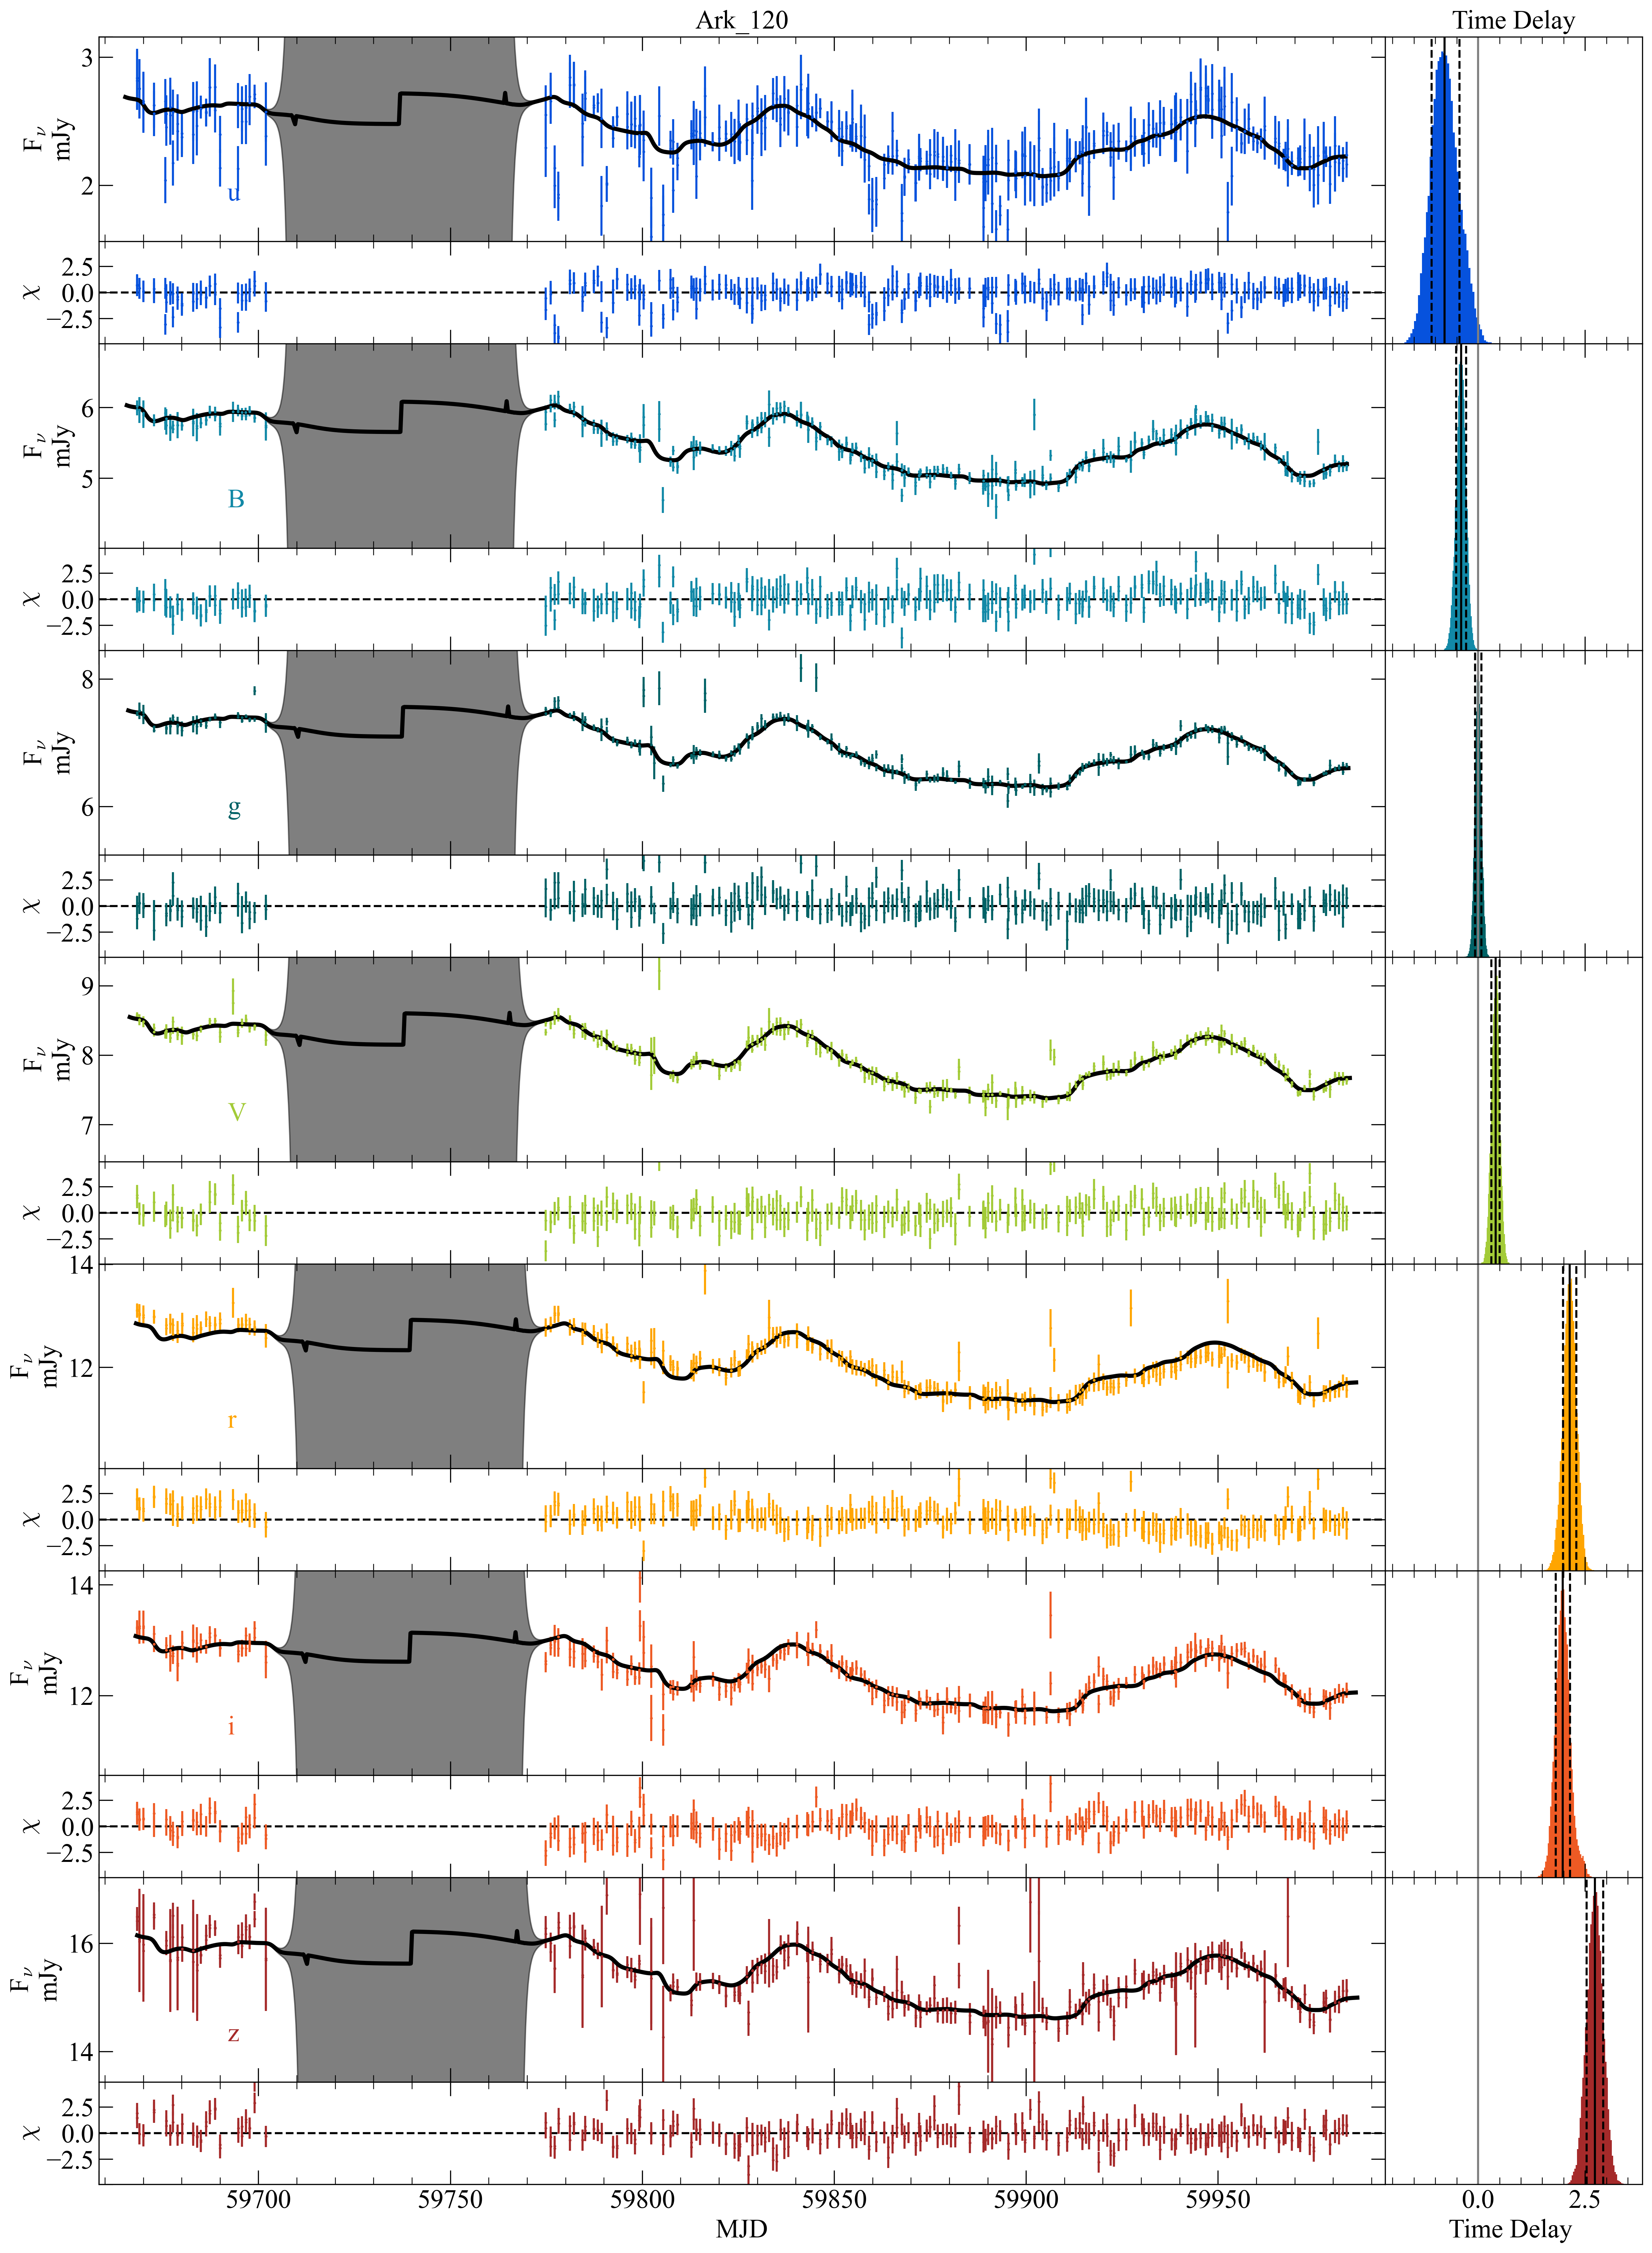

In [16]:
#importlib.reload(utils)
# Required a list of filters, same as in input of PyROA
band_colors=['#0652DD','#1289A7','#006266','#006266','#A3CB38','orange','#EE5A24','brown']

PyROA.Lightcurves(objname,filters,delay_ref,
                  datadir=datadir, outputdir=outputdir,
                  burnin=burnin, band_colors=band_colors,
                  grid=False, show_delay_ref=False)

# 4. Flux-Flux analysis

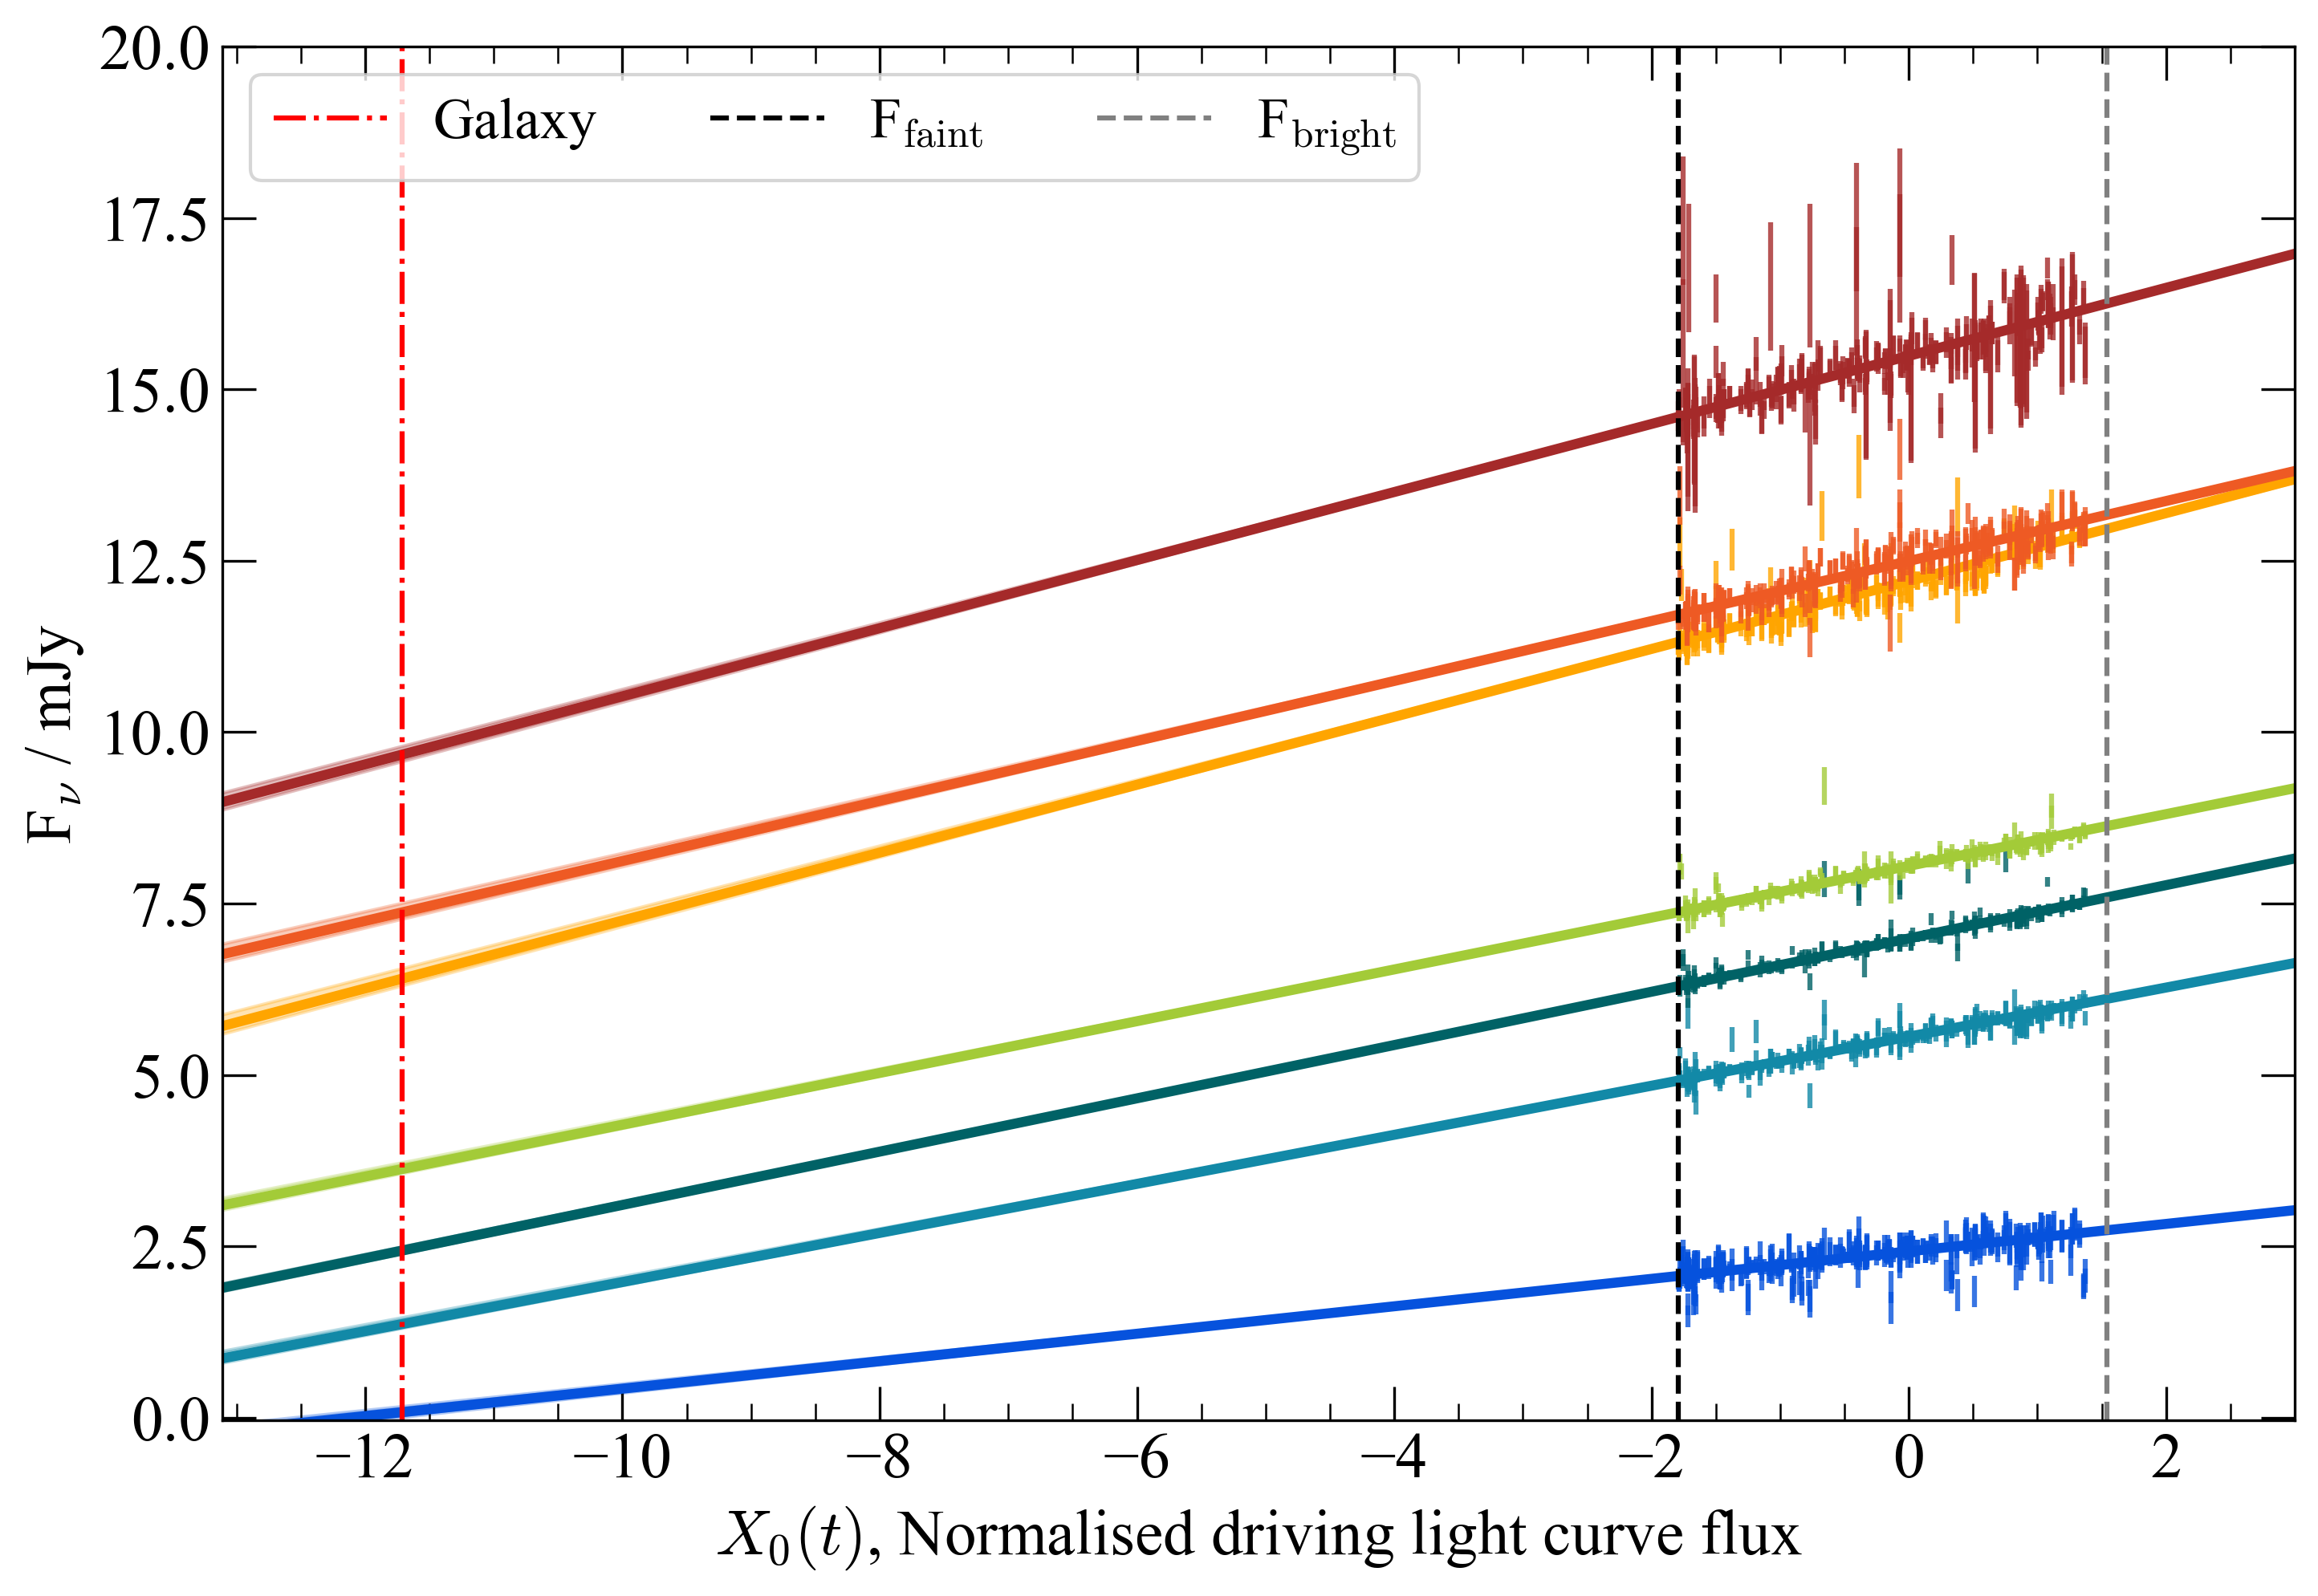

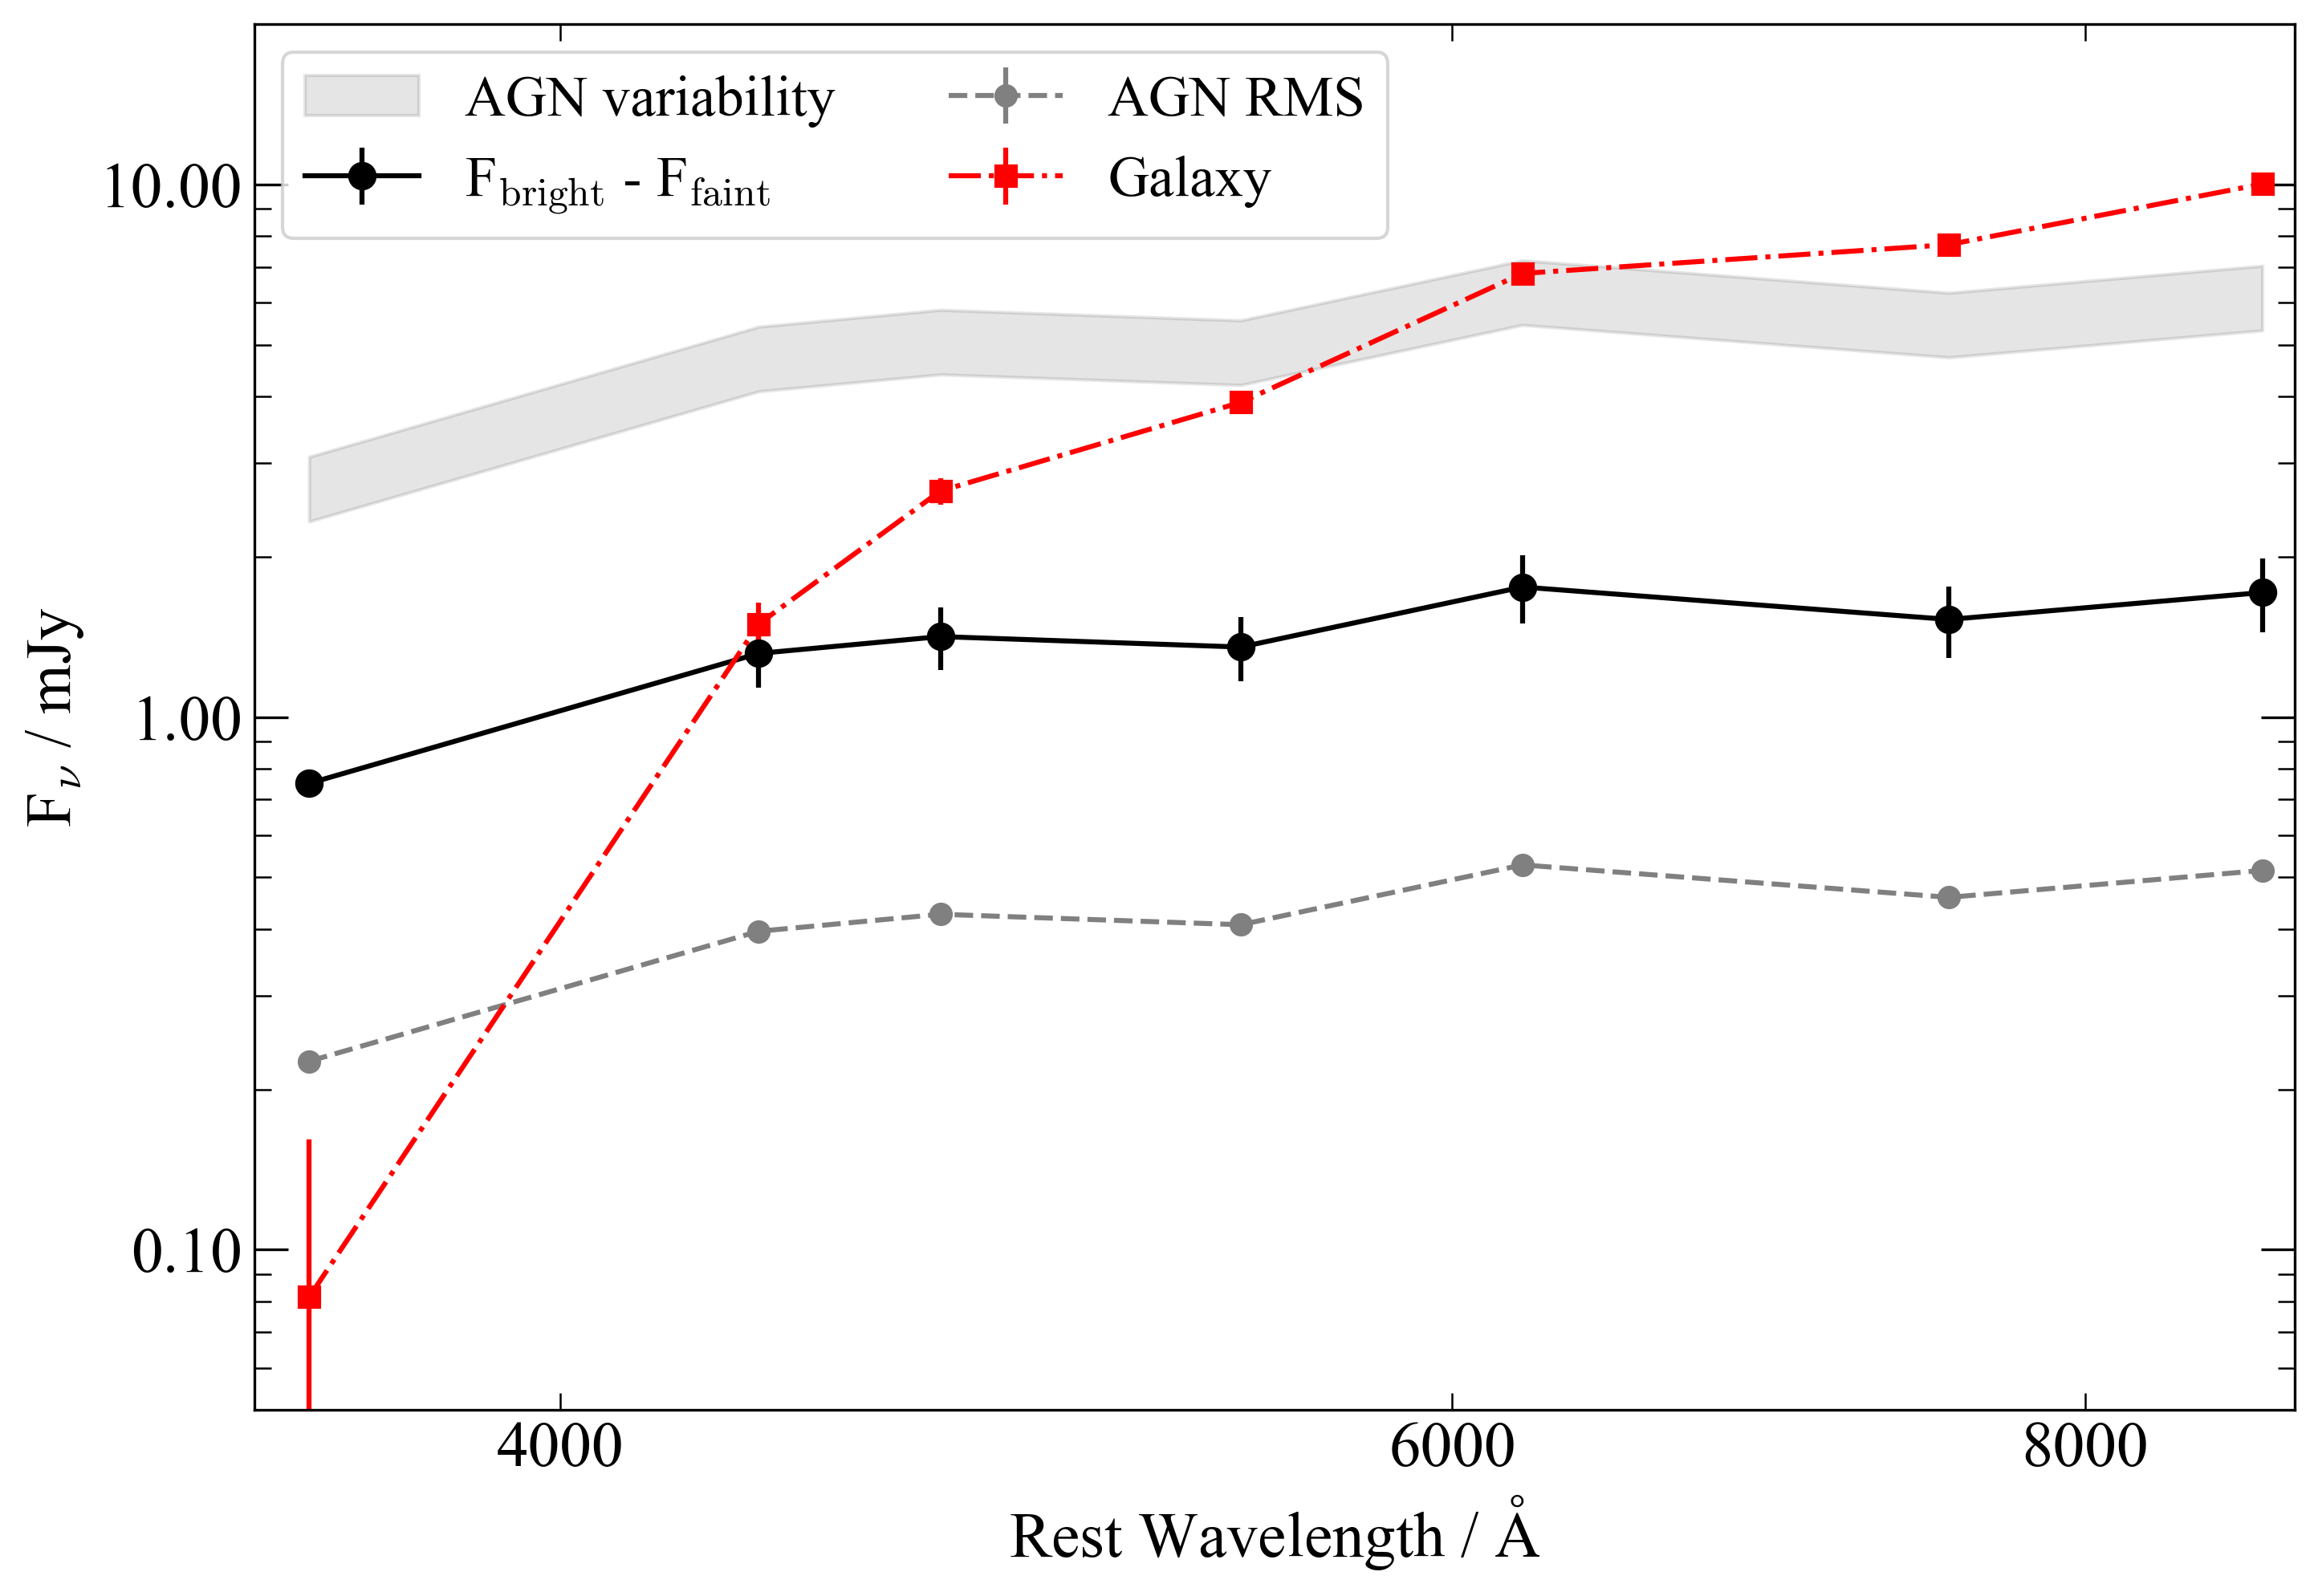

In [20]:
#importlib.reload(utils)
waves = [3580,4392,4770,5468,6215,7545,8700]
band_colors=['#0652DD','#1289A7','#006266','#006266','#A3CB38','orange','#EE5A24','brown']
gal_ref = 'u'
PyROA.FluxFlux(objname,filters,delay_ref,gal_ref,waves,
                datadir=datadir,outputdir=outputdir,
                burnin=burnin,
                band_colors=band_colors,
                ebv=0.027,redshift=0.003326,
                limits=[.05,20])


# 5. Lag Spectrum

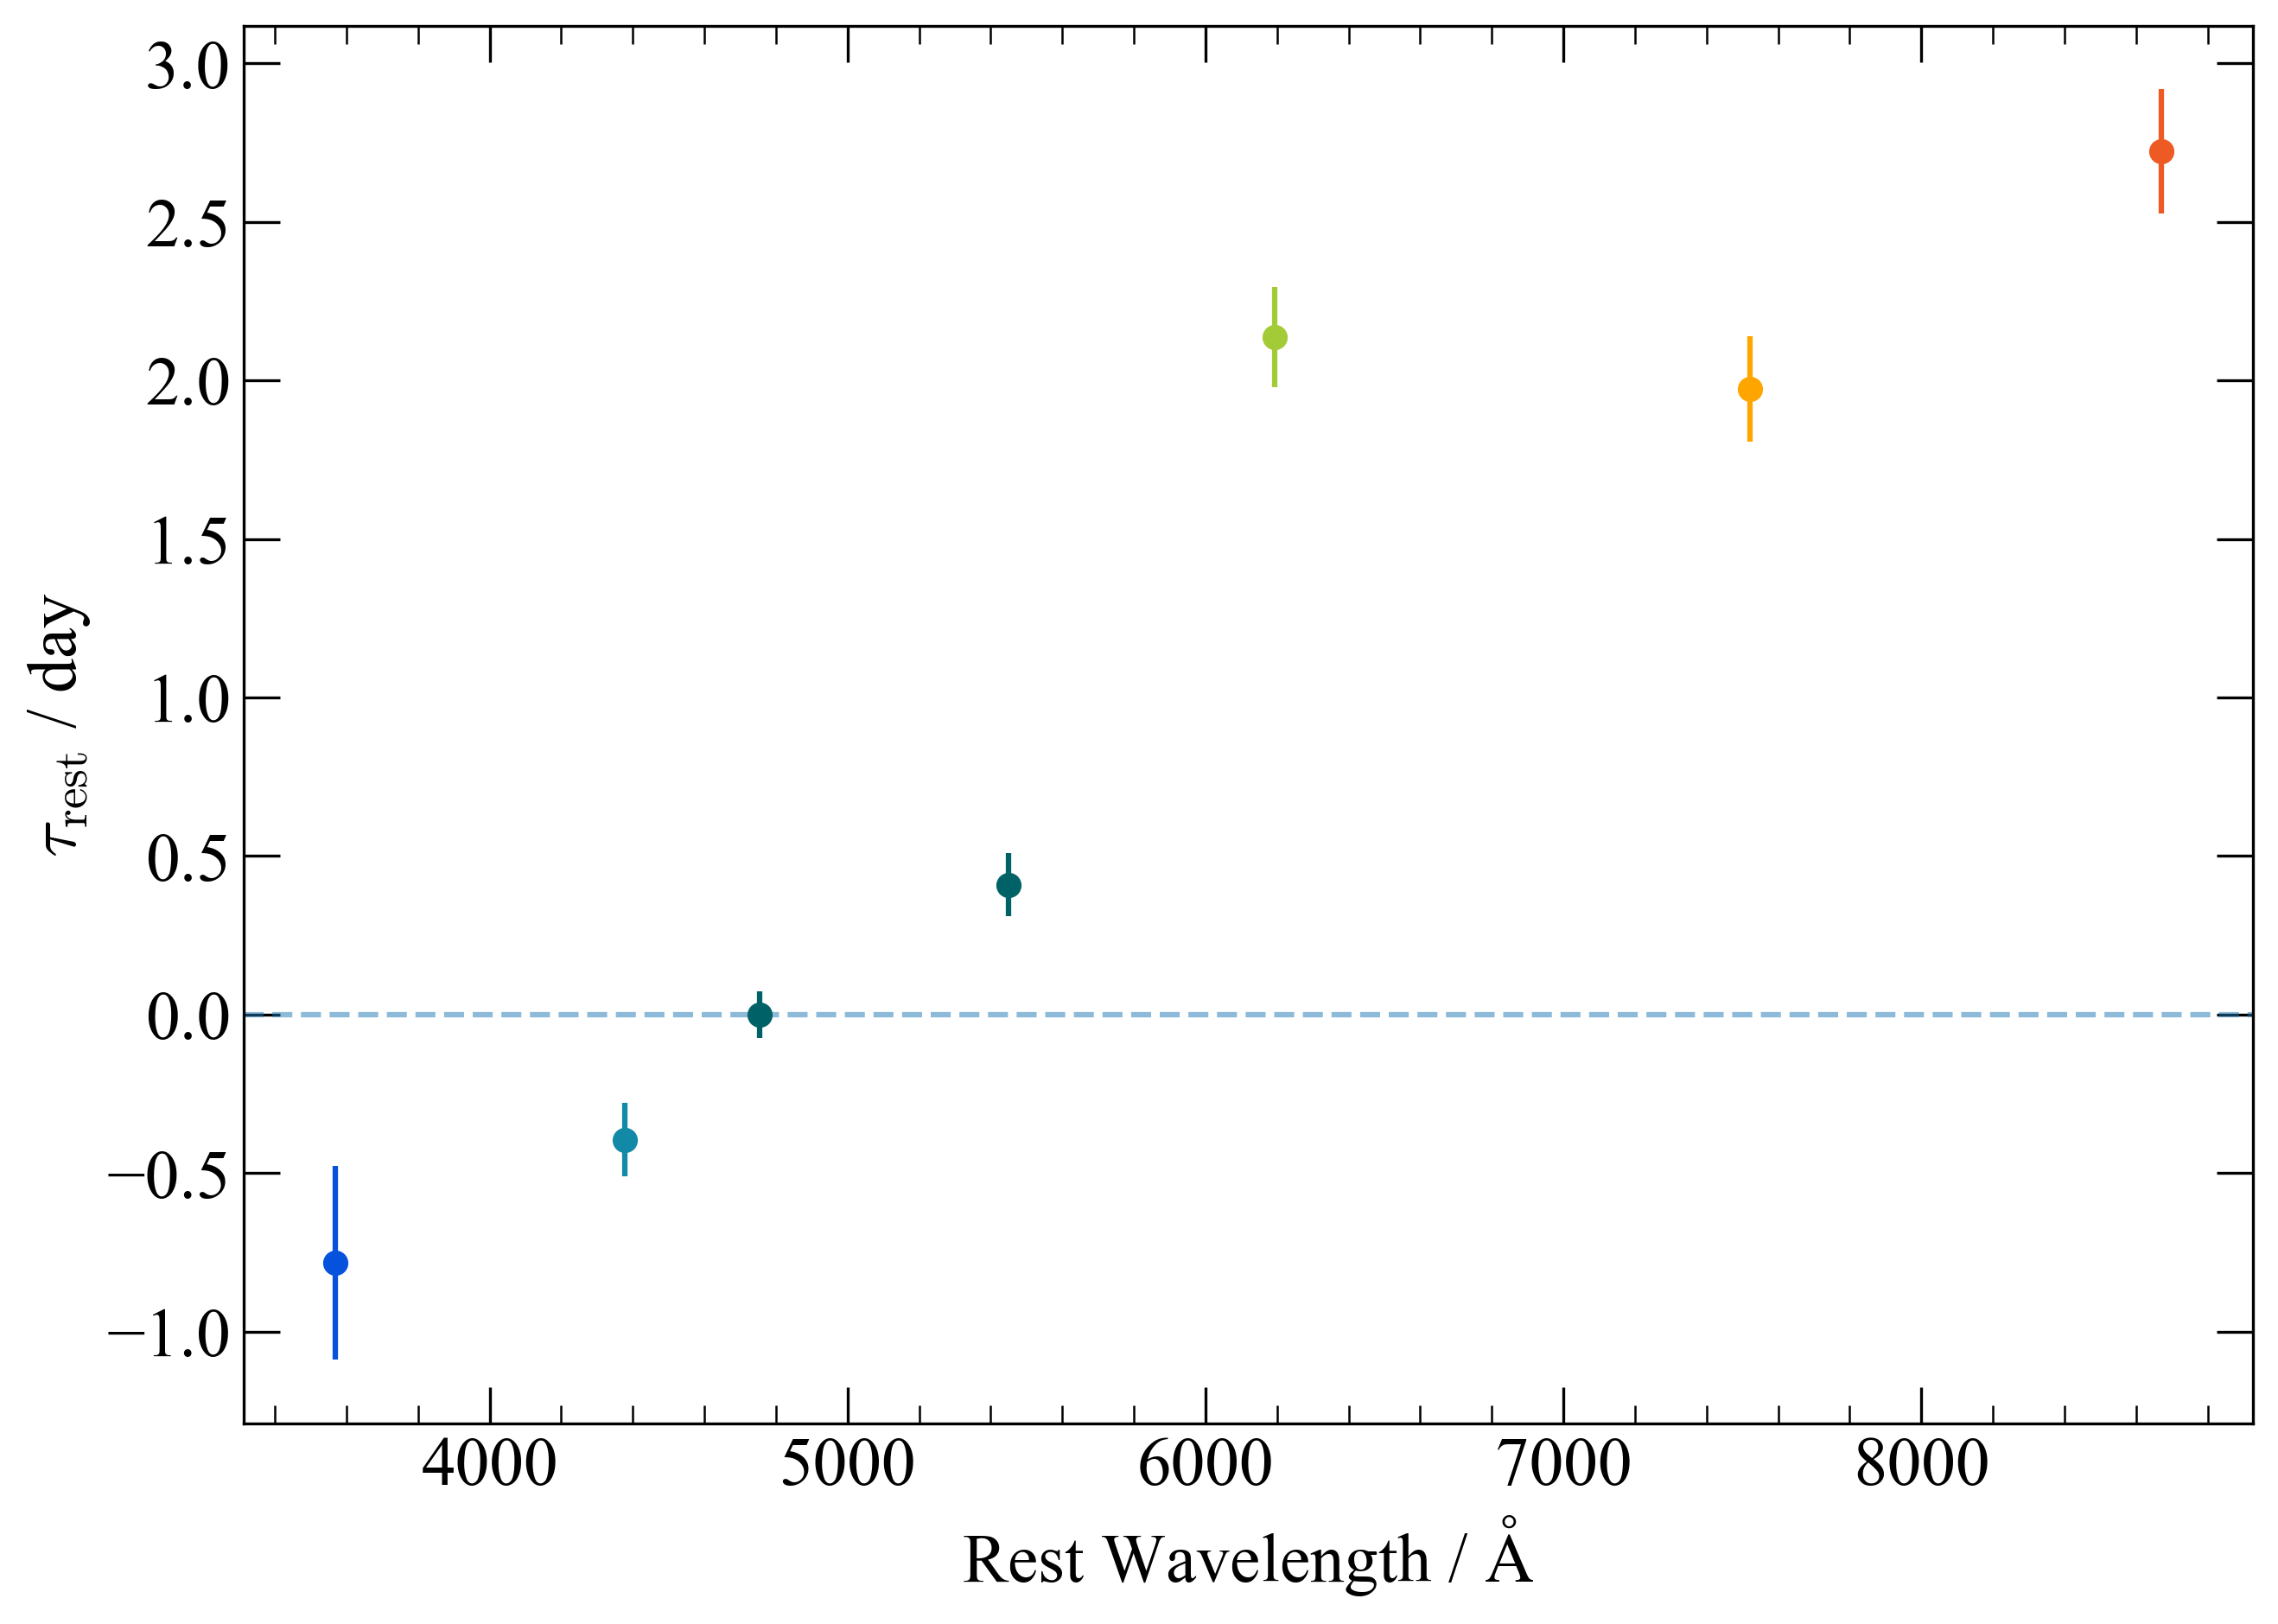

In [21]:
PyROA.LagSpectrum(filters,delay_ref,outputdir=outputdir,
                burnin=burnin,
                band_colors=band_colors,
                wavelengths=waves,redshift=0.003326)